In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# **Data**

In [2]:
food = pd.read_csv('Food.csv')
compound = pd.read_csv('Compound.csv')
nutrient = pd.read_csv('Nutrient.csv')
content = pd.read_csv('Content.csv')
health_effect = pd.read_csv('HealthEffect.csv')
compounds_health_effect = pd.read_csv('CompoundsHealthEffect.csv')
flavor = pd.read_csv('Flavor.csv')
compounds_flavor = pd.read_csv('CompoundsFlavor.csv')

C:\Users\julie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,4,5,6,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\julie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,5,6,7,8,9,13,14,21,22,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
food = food.replace('NA',np.nan)
food = food[['id', 'name', 'food_group', 'food_subgroup']]
food = food.dropna()

compound = compound.replace('NA',np.nan)
compound = compound[['id', 'name']]
compound = compound.dropna()

nutrient = nutrient.replace('NA',np.nan)
nutrient = nutrient[['id', 'name']]
nutrient = nutrient.dropna()

content = content.replace('NA',np.nan)
content = content[['source_id', 'source_type', 'food_id', 'orig_content', 'orig_unit']]
content_compound = content[(content['source_type'] == 'Compound')]
content_nutrient = content[(content['source_type'] == 'Nutrient')]
content_compound = content_compound.dropna()
content_nutrient = content_nutrient.dropna()

health_effect = health_effect.replace('NA',np.nan)
health_effect = health_effect[['id', 'name']]
health_effect = health_effect.dropna()

compounds_health_effect = compounds_health_effect.replace('NA',np.nan)
compounds_health_effect = compounds_health_effect[['compound_id', 'health_effect_id']]
compounds_health_effect = compounds_health_effect.dropna()

flavor = flavor.replace('NA',np.nan)
flavor = flavor[['id', 'name']]
flavor = flavor.dropna()

compounds_flavor = compounds_flavor.replace('NA',np.nan)
compounds_flavor = compounds_flavor[['compound_id', 'flavor_id']]
compounds_flavor = compounds_flavor.dropna()

In [4]:
content_compound = content_compound[content_compound.orig_content != 0]
content_nutrient = content_nutrient[content_nutrient.orig_content != 0]
content_compound = content_compound.drop_duplicates(subset=['source_id', 'food_id'])
content_nutrient = content_nutrient.drop_duplicates(subset=['source_id', 'food_id'])

In [5]:
#Food-Compound
for i in range(len(food)):
  food_id = food['id'].iloc[i]
  food_name = food[food['id'] == food_id]['name'].iloc[0]
  food_group = food[food['id'] == food_id]['food_group'].iloc[0]
  food_subgroup = food[food['id'] == food_id]['food_subgroup'].iloc[0]
  index = content_compound[content_compound['food_id'] == food_id].index
  content_compound.at[index, 'food_name'] = food_name
  content_compound.at[index, 'food_group'] = food_group
  content_compound.at[index, 'food_subgroup'] = food_subgroup

for i in range(len(compound)):
  compound_id = compound['id'].iloc[i]
  compound_name = compound[compound['id'] == compound_id]['name'].iloc[0]
  index = content_compound[(content_compound['source_id'] == compound_id)].index
  content_compound.at[index, 'source_name'] = compound_name

In [6]:
#Food-Nutrient
for i in range(len(food)):
  food_id = food['id'].iloc[i]
  food_name = food[food['id'] == food_id]['name'].iloc[0]
  food_group = food[food['id'] == food_id]['food_group'].iloc[0]
  food_subgroup = food[food['id'] == food_id]['food_subgroup'].iloc[0]
  index = content_nutrient[content_nutrient['food_id'] == food_id].index
  content_nutrient.at[index, 'food_name'] = food_name
  content_nutrient.at[index, 'food_group'] = food_group
  content_nutrient.at[index, 'food_subgroup'] = food_subgroup

for i in range(len(nutrient)):
  nutrient_id = nutrient['id'].iloc[i]
  nutrient_name = nutrient[nutrient['id'] == nutrient_id]['name'].iloc[0]
  index = content_nutrient[(content_nutrient['source_id'] == nutrient_id)].index
  content_nutrient.at[index, 'source_name'] = nutrient_name

In [7]:
#Compound-Health Effect
for i in range(len(health_effect)):
  health_effect_id = health_effect['id'].iloc[i]
  health_effect_name = health_effect[health_effect['id'] == health_effect_id]['name'].iloc[0]
  index = compounds_health_effect[compounds_health_effect['health_effect_id'] == health_effect_id].index
  compounds_health_effect.at[index, 'health_effect_name'] = health_effect_name

for i in range(len(compound)):
  compound_id = compound['id'].iloc[i]
  compound_name = compound[compound['id'] == compound_id]['name'].iloc[0]
  index = compounds_health_effect[compounds_health_effect['compound_id'] == compound_id].index
  compounds_health_effect.at[index, 'compound_name'] = compound_name

In [8]:
#Compound-Flavor
for i in range(len(flavor)):
  flavor_id = flavor['id'].iloc[i]
  flavor_name = flavor[flavor['id'] == flavor_id]['name'].iloc[0]
  index = compounds_flavor[compounds_flavor['flavor_id'] == flavor_id].index
  compounds_flavor.at[index, 'flavor_name'] = flavor_name

for i in range(len(compound)):
  compound_id = compound['id'].iloc[i]
  compound_name = compound[compound['id'] == compound_id]['name'].iloc[0]
  index = compounds_flavor[compounds_flavor['compound_id'] == compound_id].index
  compounds_flavor.at[index, 'compound_name'] = compound_name

# **Nutri-Scores**

Preprocessing that needs to be done to compute the Nutri-Scores:

- convert mg/100g to g/100g

- convert kcal/100g to kJ/100g

- EXCEPT SODIUM !!!

In [9]:
content_nutrient.orig_unit = content_nutrient.orig_unit.replace('mg/100 g', 'mg/100g')
content_compound.orig_unit = content_compound.orig_unit.replace('mg/100 g', 'mg/100g')

In [10]:
for i in range(len(content_nutrient)):
  if content_nutrient['orig_unit'].iloc[i] == 'mg/100g':
    content_nutrient['orig_content'].iloc[i] /= 1000
    content_nutrient['orig_unit'].iloc[i] = 'g/100g'
  elif content_nutrient['orig_unit'].iloc[i] == 'kcal/100g':
    content_nutrient['orig_content'].iloc[i] *= 4.184
    content_nutrient['orig_unit'].iloc[i] = 'kJ/100g'

C:\Users\julie\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [11]:
target = [2, 3, 4, 5, 38]
content_nutrient[content_nutrient['source_id'].isin(target)]['orig_unit'].unique()

array(['g/100g', 'kJ/100g'], dtype=object)

In [12]:
target = [3524]
content_compound[content_compound['source_id'].isin(target)]['orig_unit'].unique()

array(['mg/100g'], dtype=object)

In [13]:
def scoreEnergy(energy):
  if energy <= 335:
    return 0
  elif energy > 3350:
    return 10
  elif energy > 3015:
    return 9
  elif energy > 2680:
    return 8
  elif energy > 2345:
    return 7
  elif energy > 2010:
    return 6
  elif energy > 1675:
    return 5
  elif energy > 1340:
    return 4
  elif energy > 1005:
    return 3
  elif energy > 670:
    return 2
  elif energy > 335:
    return 1

def scoreSugar(carbohydrates, fibers):
  sugar = carbohydrates - fibers
  if sugar <= 4.5:
    return 0
  elif sugar > 45:
    return 10
  elif sugar > 40:
    return 9
  elif sugar > 36:
    return 8
  elif sugar > 31:
    return 7
  elif sugar > 27:
    return 6
  elif sugar > 22.5:
    return 5
  elif sugar > 18:
    return 4
  elif sugar > 13.5:
    return 3
  elif sugar > 9:
    return 2
  elif sugar > 4.5:
    return 1

def scoreSaturatedFattyAcis(saturatedFattyAcids):
  if saturatedFattyAcids <= 1:
    return 0
  elif saturatedFattyAcids > 10:
    return 10
  elif saturatedFattyAcids > 9:
    return 9
  elif saturatedFattyAcids > 8:
    return 8
  elif saturatedFattyAcids > 7:
    return 7
  elif saturatedFattyAcids > 6:
    return 6
  elif saturatedFattyAcids > 5:
    return 5
  elif saturatedFattyAcids > 4:
    return 4
  elif saturatedFattyAcids > 3:
    return 3
  elif saturatedFattyAcids > 2:
    return 2
  elif saturatedFattyAcids > 1:
    return 1

def scoreSodium(sodium):
  if sodium <= 90:
    return 0
  elif sodium > 900:
    return 10
  elif sodium > 810:
    return 9
  elif sodium > 720:
    return 8
  elif sodium > 630:
    return 7
  elif sodium > 540:
    return 6
  elif sodium > 450:
    return 5
  elif sodium > 360:
    return 4
  elif sodium > 270:
    return 3
  elif sodium > 180:
    return 2
  elif sodium > 90:
    return 1

def scoreFibers(fibers):
  if fibers <= 0.9:
    return 0
  elif fibers > 4.7:
    return -5
  elif fibers > 3.7:
    return -4
  elif fibers > 2.8:
    return -3
  elif fibers > 1.9:
    return -2
  elif fibers > 0.9:
    return -1

def scoreProteins(proteins):
  if proteins <= 1.6:
    return 0
  elif proteins > 8:
    return -5
  elif proteins > 6.4:
    return -4
  elif proteins > 4.8:
    return -3
  elif proteins > 3.2:
    return -2
  elif proteins > 1.6:
    return -1

def nutriScoreFoods(nutri_score):
  if nutri_score >= -15 and nutri_score <= -1:
    return 'A'
  elif nutri_score >= 0 and nutri_score <= 2:
    return 'B'
  elif nutri_score >= 3 and nutri_score <= 10:
    return 'C'
  elif nutri_score >= 11 and nutri_score <= 18:
    return 'D'
  elif nutri_score >= 19 and nutri_score <= 40:
    return 'E'

def nutriScoreBeverages(nutri_score):
  if nutri_score <= 1:
    return 'B'
  elif nutri_score >= 2 and nutri_score <= 5:
    return 'C'
  elif nutri_score >= 6 and nutri_score <= 9:
    return 'D'
  elif nutri_score >= 10 and nutri_score <= 40:
    return 'E'

In [14]:
#add sodium score
target_sodium_id = [3524]
for i in range(len(food)):
  food_id = food['id'].iloc[i]
  index = content_compound[content_compound['food_id'] == food_id].index
  df_sodium = content_compound.loc[index]
  df_sodium = df_sodium[df_sodium['source_id'].isin(target_sodium_id)]
  if len(df_sodium) == 0:
    continue
  score = scoreSodium(df_sodium.orig_content.iloc[0])
  content_compound.at[df_sodium.index, 'score'] = score

In [15]:
target_protein_id = [2]
target_carbohydrate_id = [3]
target_fatty_acics_id = [4]
target_fiber_id = [5]
target_energy = [38]
for i in range(len(food)):
  food_id = food['id'].iloc[i]
  index = content_nutrient[content_nutrient['food_id'] == food_id].index
  df = content_nutrient.loc[index]

  #add protein score
  df_protein = df[df['source_id'].isin(target_protein_id)]
  if len(df_protein) == 0:
    continue
  score = scoreProteins(df_protein.orig_content.iloc[0])
  content_nutrient.at[df_protein.index, 'score'] = score

  #add sugar score
  df_carbohydrate = df[df['source_id'].isin(target_carbohydrate_id)]
  df_fiber = df[df['source_id'].isin(target_fiber_id)]
  if len(df_carbohydrate) == 0:
    continue
  if len(df_fiber) == 0:
    continue
  score = scoreSugar(df_carbohydrate.orig_content.iloc[0], df_fiber.orig_content.iloc[0])
  content_nutrient.at[df_carbohydrate.index, 'score'] = score

  #add fatty acids score
  df_fatty_acids = df[df['source_id'].isin(target_fatty_acics_id)]
  if len(df_fatty_acids) == 0:
    continue
  score = scoreSaturatedFattyAcis(df_fatty_acids.orig_content.iloc[0])
  content_nutrient.at[df_fatty_acids.index, 'score'] = score

  #add fiber score
  df_fiber = df[df['source_id'].isin(target_fiber_id)]
  if len(df_fiber) == 0:
    continue
  score = scoreFibers(df_fiber.orig_content.iloc[0])
  content_nutrient.at[df_fiber.index, 'score'] = score

  #add energy score
  df_energy = df[df['source_id'].isin(target_energy)]
  if len(df_energy) == 0:
    continue
  score = scoreEnergy(df_energy.orig_content.iloc[0])
  content_nutrient.at[df_energy.index, 'score'] = score

In [16]:
#add Nutri-Score
target_nutrient_id = [2,3,4,5,38]
temp_nutrient = content_nutrient[content_nutrient['source_id'].isin(target_nutrient_id)]

target_compound_id = [3524]
temp_compound = content_compound[content_compound['source_id'].isin(target_compound_id)]

for i in range(len(food)):
  food_id = food['id'].iloc[i]
  food_group = food['food_group'].iloc[i]
  food_subgroup = food['food_subgroup'].iloc[i]
  index_nutrient = content_nutrient[content_nutrient['food_id'] == food_id].index
  index_compound = content_compound[content_compound['food_id'] == food_id].index

  temp_index_nutrient = temp_nutrient[temp_nutrient['food_id'] == food_id].index
  temp_index_compound = temp_compound[temp_compound['food_id'] == food_id].index
  df_nutrient = temp_nutrient.loc[temp_index_nutrient]
  df_compound = temp_compound.loc[temp_index_compound]
  df = pd.concat([df_nutrient, df_compound])
  nutri_score = df['score'].sum(axis = 0)

  if food_subgroup == 'Waters':
    nutri_score_category = 'A'
  elif food_group == 'Beverages':
    nutri_score_category = nutriScoreBeverages(nutri_score)
  else:
    nutri_score_category = nutriScoreFoods(nutri_score)

  content_nutrient.at[index_nutrient, 'nutri_score'] = nutri_score
  content_compound.at[index_compound, 'nutri_score'] = nutri_score
  content_nutrient.at[index_nutrient, 'nutri_score_category'] = nutri_score_category
  content_compound.at[index_compound, 'nutri_score_category'] = nutri_score_category

In [17]:
content_nutrient = content_nutrient[content_nutrient['food_name'].notna()]
content_compound = content_compound[content_compound['food_name'].notna()]

In [18]:
compounds_health_effect.index.name = 'content_id'
compounds_flavor.index.name = 'content_id'

In [19]:
content_nutrient.insert(0, 'content_id', content_nutrient.index)
content_compound.insert(0, 'content_id', content_compound.index)

# **Tags**

In [20]:
#mg/day
rdi_sodium = 2000
rdi_potassium = 2000
rdi_calcium = 800
rdi_iron = 14
rdi_phosphorus = 700

In [21]:
target = [3524, 3522, 3514, 16258, 3521]
content_compound[content_compound['source_id'].isin(target)]['orig_unit'].unique()

array(['mg/100g'], dtype=object)

In [22]:
content_compound[content_compound['source_id'].isin(target)]['source_name'].unique()

array(['Calcium', 'Iron', 'Sodium', 'Potassium', 'Phosphorus'],
      dtype=object)

In [23]:
target_sodium_id = [3524]
target_potassium_id = [3522]
target_calcium_id = [3514]
target_iron_id = [16258]
target_phosphorus_id = [3521]

for i in range(len(food)):
  food_id = food['id'].iloc[i]
  index_nutrient = content_nutrient[content_nutrient['food_id'] == food_id].index
  index_compound = content_compound[content_compound['food_id'] == food_id].index
  df = content_compound.loc[index_compound]

  if len(df) == 0:
    continue
  
  df_sodium = df[df['source_id'].isin(target_sodium_id)]
  if len(df_sodium) != 0 and df_sodium['orig_content'].iloc[0]/rdi_sodium > 0.3:
    sodium = 'high_sodium'
  elif len(df_sodium) == 0 or df_sodium['orig_content'].iloc[0]/rdi_sodium <= 0.3: 
    sodium = np.nan

  df_potassium = df[df['source_id'].isin(target_potassium_id)]
  if len(df_potassium) != 0 and df_potassium['orig_content'].iloc[0]/rdi_potassium > 0.3:
    potassium = 'high_potassium'
  elif len(df_potassium) == 0 or df_potassium['orig_content'].iloc[0]/rdi_potassium <= 0.3: 
    potassium = np.nan

  df_calcium = df[df['source_id'].isin(target_calcium_id)]
  if len(df_calcium) != 0 and df_calcium['orig_content'].iloc[0]/rdi_calcium > 0.3:
    calcium = 'high_calcium'
  elif len(df_calcium) == 0 or df_calcium['orig_content'].iloc[0]/rdi_calcium <= 0.3: 
    calcium = np.nan

  df_iron = df[df['source_id'].isin(target_iron_id)]
  if len(df_iron) != 0 and df_iron['orig_content'].iloc[0]/rdi_iron > 0.3:
    iron = 'high_iron'
  elif len(df_iron) == 0 or df_iron['orig_content'].iloc[0]/rdi_iron <= 0.3: 
    iron = np.nan

  df_phosphorus = df[df['source_id'].isin(target_phosphorus_id)]
  if len(df_phosphorus) != 0 and df_phosphorus['orig_content'].iloc[0]/rdi_phosphorus > 0.3:
    phosphorus = 'high_phosphorus'
  elif len(df_phosphorus) == 0 or df_phosphorus['orig_content'].iloc[0]/rdi_phosphorus <= 0.3: 
    phosphorus = np.nan

  content_nutrient.at[index_nutrient, 'sodium'] = sodium
  content_compound.at[index_compound, 'sodium'] = sodium
  content_nutrient.at[index_nutrient, 'potassium'] = potassium
  content_compound.at[index_compound, 'potassium'] = potassium
  content_nutrient.at[index_nutrient, 'calcium'] = calcium
  content_compound.at[index_compound, 'calcium'] = calcium
  content_nutrient.at[index_nutrient, 'iron'] = iron
  content_compound.at[index_compound, 'iron'] = iron
  content_nutrient.at[index_nutrient, 'phosphorus'] = phosphorus
  content_compound.at[index_compound, 'phosphorus'] = phosphorus

In [24]:
#mg/day
rdi_vitaminA = 0.8
rdi_vitaminC = 80
rdi_vitaminD2 = 0.005
rdi_vitaminD3 = 0.005
rdi_vitaminEAlpha = 12
rdi_vitaminEGamma = 12
rdi_vitaminEDelta = 12
rdi_vitanimEBeta = 12
rdi_vitaminK1 = 0.075
rdi_vitaminK2 = 0.075
rdi_vitaminB1 = 1.1
rdi_vitaminB2 = 1.4
rdi_vitaminB3 = 16
rdi_vitaminB5 = 0.006
rdi_vitaminB6 = 1.4
rdi_vitaminB8 = 0.05
rdi_vitaminB11 = 0.2

In [25]:
content_compound.orig_unit = content_compound.orig_unit.replace('mg/100 g fresh weight', 'mg/100g')
content_compound.orig_unit = content_compound.orig_unit.replace('NE', 'mg/100g')
content_compound.orig_unit = content_compound.orig_unit.replace('uM', 'mg/100g')

In [26]:
for i in range(len(content_compound)):
  if content_compound['orig_unit'].iloc[i] == 'α-TE':
    content_compound['orig_content'].iloc[i] = content_compound['orig_content'].iloc[i]*0.67
    content_compound['orig_unit'].iloc[i] = 'mg/100g'

C:\Users\julie\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [27]:
target = [30833, 1223, 27659, 12735, 565, 2431, 2432, 12574, 12360, 1310, 8425, 12163, 1014, 8323, 574, 14513, 14507]
content_compound[content_compound['source_id'].isin(target)]['orig_unit'].unique()

array(['mg/100g'], dtype=object)

In [28]:
content_compound[content_compound['source_id'].isin(target)]['source_name'].unique()

array(['Riboflavine', 'Nicotinic acid', 'Pyridoxine', 'Pantothenic acid',
       'Folic acid', 'alpha-Tocopherol', 'Biotin', 'Phytomenadione',
       'Vitamin D3', 'Thiamine', 'gamma-Tocopherol', 'd-Tocopherol',
       'Ascorbic acid'], dtype=object)

In [29]:
target_vitaminA = [30833]
target_vitaminC = [1223]
target_vitaminD2 = [27659]
target_vitaminD3 = [12735]
target_vitaminEAlpha = [565]
target_vitaminEGamma = [2431]
target_vitaminEDelta = [2432]
target_vitaminEBeta = [12574]
target_vitaminK1 = [12360]
target_vitaminK2 = [1310]
target_vitaminB1 = [8425]
target_vitaminB2 = [12163]
target_vitaminB3 = [1014]
target_vitaminB5 = [8323]
target_vitaminB6 = [574]
target_vitaminB8 = [14513]
target_vitaminB11 = [14507]

for i in range(len(food)):
  food_id = food['id'].iloc[i]
  index_nutrient = content_nutrient[content_nutrient['food_id'] == food_id].index
  index_compound = content_compound[content_compound['food_id'] == food_id].index
  df = content_compound.loc[index_compound]

  if len(df) == 0:
    continue
  
  df_vitaminA = df[df['source_id'].isin(target_vitaminA)]
  if len(df_vitaminA) != 0 and df_vitaminA['orig_content'].iloc[0]/rdi_vitaminA > 0.3:
    df_vitaminA = 'high_vitaminA'
  elif len(df_vitaminA) == 0 or df_vitaminA['orig_content'].iloc[0]/rdi_vitaminA <= 0.3: 
    vitaminA = np.nan

  df_vitaminC = df[df['source_id'].isin(target_vitaminC)]
  if len(df_vitaminC) != 0 and df_vitaminC['orig_content'].iloc[0]/rdi_vitaminC > 0.3:
    vitaminC = 'high_vitaminC'
  elif len(df_vitaminC) == 0 or df_vitaminC['orig_content'].iloc[0]/rdi_vitaminC <= 0.3: 
    vitaminC = np.nan

  df_vitaminD2 = df[df['source_id'].isin(target_vitaminD2)]
  if len(df_vitaminD2) != 0 and df_vitaminD2['orig_content'].iloc[0]/rdi_vitaminD2 > 0.3:
    vitaminD2 = 'high_vitaminD2'
  elif len(df_vitaminD2) == 0 or df_vitaminD2['orig_content'].iloc[0]/rdi_vitaminD2 <= 0.3: 
    vitaminD2 = np.nan

  df_vitaminD3 = df[df['source_id'].isin(target_vitaminD3)]
  if len(df_vitaminD3) != 0 and df_vitaminD3['orig_content'].iloc[0]/rdi_vitaminD3 > 0.3:
    vitaminD3 = 'high_vitaminD3'
  elif len(df_vitaminD3) == 0 or df_vitaminD3['orig_content'].iloc[0]/rdi_vitaminD3 <= 0.3: 
    vitaminD3 = np.nan

  df_vitaminEAlpha = df[df['source_id'].isin(target_vitaminEAlpha)]
  if len(df_vitaminEAlpha) != 0 and df_vitaminEAlpha['orig_content'].iloc[0]/rdi_vitaminEAlpha > 0.3:
    vitaminEAlpha = 'high_vitaminEAlpha'
  elif len(df_vitaminEAlpha) == 0 or df_vitaminEAlpha['orig_content'].iloc[0]/rdi_vitaminEAlpha <= 0.3: 
    vitaminEAlpha = np.nan

  df_vitaminEGamma = df[df['source_id'].isin(target_vitaminEGamma)]
  if len(df_vitaminEGamma) != 0 and df_vitaminEGamma['orig_content'].iloc[0]/rdi_vitaminEGamma > 0.3:
    vitaminEGamma = 'high_vitaminEGamma'
  elif len(df_vitaminEGamma) == 0 or df_vitaminEGamma['orig_content'].iloc[0]/rdi_vitaminEGamma <= 0.3: 
    vitaminEGamma = np.nan

  df_vitaminEDelta = df[df['source_id'].isin(target_vitaminEDelta)]
  if len(df_vitaminEDelta) != 0 and df_vitaminEDelta['orig_content'].iloc[0]/rdi_vitaminEDelta > 0.3:
    vitaminEDelta = 'high_vitaminEDelta'
  elif len(df_vitaminEDelta) == 0 or df_vitaminEDelta['orig_content'].iloc[0]/rdi_vitaminEDelta <= 0.3: 
    vitaminEDelta = np.nan

  df_vitaminEBeta = df[df['source_id'].isin(target_vitaminEBeta)]
  if len(df_vitaminEBeta) != 0 and df_vitaminEBeta['orig_content'].iloc[0]/rdi_vitanimEBeta > 0.3:
    vitaminEBeta = 'high_vitaminEBeta'
  elif len(df_vitaminEBeta) == 0 or df_vitaminEBeta['orig_content'].iloc[0]/rdi_vitanimEBeta <= 0.3: 
    vitaminEBeta = np.nan

  df_vitaminK1 = df[df['source_id'].isin(target_vitaminK1)]
  if len(df_vitaminK1) != 0 and df_vitaminK1['orig_content'].iloc[0]/rdi_vitaminK1 > 0.3:
    vitaminK1 = 'high_vitaminK1'
  elif len(df_vitaminK1) == 0 or df_vitaminK1['orig_content'].iloc[0]/rdi_vitaminK1 <= 0.3: 
    vitaminK1 = np.nan

  df_vitaminK2 = df[df['source_id'].isin(target_vitaminK2)]
  if len(df_vitaminK2) != 0 and df_vitaminK2['orig_content'].iloc[0]/rdi_vitaminK2 > 0.3:
    vitaminK2 = 'high_vitaminK2'
  elif len(df_vitaminK2) == 0 or df_vitaminK2['orig_content'].iloc[0]/rdi_vitaminK2 <= 0.3: 
    vitaminK2 = np.nan

  df_vitaminB1 = df[df['source_id'].isin(target_vitaminB1)]
  if len(df_vitaminB1) != 0 and df_vitaminB1['orig_content'].iloc[0]/rdi_vitaminB1 > 0.3:
    vitaminB1 = 'high_vitaminB1'
  elif len(df_vitaminB1) == 0 or df_vitaminB1['orig_content'].iloc[0]/rdi_vitaminB1 <= 0.3: 
    vitaminB1 = np.nan

  df_vitaminB2 = df[df['source_id'].isin(target_vitaminB2)]
  if len(df_vitaminB2) != 0 and df_vitaminB2['orig_content'].iloc[0]/rdi_vitaminB2 > 0.3:
    vitaminB2 = 'high_vitaminB2'
  elif len(df_vitaminB2) == 0 or df_vitaminB2['orig_content'].iloc[0]/rdi_vitaminB2 <= 0.3: 
    vitaminB2 = np.nan

  df_vitaminB3 = df[df['source_id'].isin(target_vitaminB3)]
  if len(df_vitaminB3) != 0 and df_vitaminB3['orig_content'].iloc[0]/rdi_vitaminB3 > 0.3:
    vitaminB3 = 'high_vitaminB3'
  elif len(df_vitaminB3) == 0 or df_vitaminB3['orig_content'].iloc[0]/rdi_vitaminB3 <= 0.3: 
    vitaminB3 = np.nan

  df_vitaminB5 = df[df['source_id'].isin(target_vitaminB5)]
  if len(df_vitaminB5) != 0 and df_vitaminB5['orig_content'].iloc[0]/rdi_vitaminB5 > 0.3:
    vitaminB5 = 'high_vitaminB5'
  elif len(df_vitaminB5) == 0 or df_vitaminB5['orig_content'].iloc[0]/rdi_vitaminB5 <= 0.3: 
    vitaminB5 = np.nan

  df_vitaminB6 = df[df['source_id'].isin(target_vitaminB6)]
  if len(df_vitaminB6) != 0 and df_vitaminB6['orig_content'].iloc[0]/rdi_vitaminB6 > 0.3:
    vitaminB6 = 'high_vitaminB6'
  elif len(df_vitaminB6) == 0 or df_vitaminB6['orig_content'].iloc[0]/rdi_vitaminB6<= 0.3: 
    vitaminB6 = np.nan

  df_vitaminB8 = df[df['source_id'].isin(target_vitaminB8)]
  if len(df_vitaminB8) != 0 and df_vitaminB8['orig_content'].iloc[0]/rdi_vitaminB8 > 0.3:
    vitaminB8 = 'high_vitaminB8'
  elif len(df_vitaminB8) == 0 or df_vitaminB8['orig_content'].iloc[0]/rdi_vitaminB8 <= 0.3: 
    vitaminB8 = np.nan

  df_vitaminB11 = df[df['source_id'].isin(target_vitaminB11)]
  if len(df_vitaminB11) != 0 and df_vitaminB11['orig_content'].iloc[0]/rdi_vitaminB11 > 0.3:
    vitaminB11 = 'high_vitaminB11'
  elif len(df_vitaminB11) == 0 or df_vitaminB11['orig_content'].iloc[0]/rdi_vitaminB11 <= 0.3: 
    vitaminB11 = np.nan

  content_nutrient.at[index_nutrient, 'vitaminA'] = vitaminA
  content_compound.at[index_compound, 'vitaminA'] = vitaminA
  content_nutrient.at[index_nutrient, 'vitaminC'] = vitaminC
  content_compound.at[index_compound, 'vitaminC'] = vitaminC
  content_nutrient.at[index_nutrient, 'vitaminD2'] = vitaminD2
  content_compound.at[index_compound, 'vitaminD2'] = vitaminD2
  content_nutrient.at[index_nutrient, 'vitaminD3'] = vitaminD3
  content_compound.at[index_compound, 'vitaminD3'] = vitaminD3
  content_nutrient.at[index_nutrient, 'vitaminEAlpha'] = vitaminEAlpha
  content_compound.at[index_compound, 'vitaminEAlpha'] = vitaminEAlpha
  content_nutrient.at[index_nutrient, 'vitaminEGamma'] = vitaminEGamma
  content_compound.at[index_compound, 'vitaminEGamma'] = vitaminEGamma
  content_nutrient.at[index_nutrient, 'vitaminEDelta'] = vitaminEDelta
  content_compound.at[index_compound, 'vitaminEDelta'] = vitaminEDelta
  content_nutrient.at[index_nutrient, 'vitaminEBeta'] = vitaminEBeta
  content_compound.at[index_compound, 'vitaminEBeta'] = vitaminEBeta
  content_nutrient.at[index_nutrient, 'vitaminK1'] = vitaminK1
  content_compound.at[index_compound, 'vitaminK1'] = vitaminK1
  content_nutrient.at[index_nutrient, 'vitaminK2'] = vitaminK2
  content_compound.at[index_compound, 'vitaminK2'] = vitaminK2
  content_nutrient.at[index_nutrient, 'vitaminB1'] = vitaminB1
  content_compound.at[index_compound, 'vitaminB1'] = vitaminB1
  content_nutrient.at[index_nutrient, 'vitaminB2'] = vitaminB2
  content_compound.at[index_compound, 'vitaminB2'] = vitaminB2
  content_nutrient.at[index_nutrient, 'vitaminB3'] = vitaminB3
  content_compound.at[index_compound, 'vitaminB3'] = vitaminB3
  content_nutrient.at[index_nutrient, 'vitaminB5'] = vitaminB5
  content_compound.at[index_compound, 'vitaminB5'] = vitaminB5
  content_nutrient.at[index_nutrient, 'vitaminB6'] = vitaminB6
  content_compound.at[index_compound, 'vitaminB6'] = vitaminB6
  content_nutrient.at[index_nutrient, 'vitaminB8'] = vitaminB8
  content_compound.at[index_compound, 'vitaminB8'] = vitaminB8
  content_nutrient.at[index_nutrient, 'vitaminB11'] = vitaminB11
  content_compound.at[index_compound, 'vitaminB11'] = vitaminB11

In [30]:
allHasQuality = []
for i in range(len(content_nutrient)):
  hasQuality = []
  for j in range(13, len(content_nutrient.columns)):
    if 'high' in str(content_nutrient.iloc[i][j]):
      hasQuality.append(content_nutrient.iloc[i][j])
  allHasQuality.append(hasQuality)
content_nutrient['hasQuality'] = allHasQuality

allHasQuality = []
for i in range(len(content_compound)):
  hasQuality = []
  for j in range(13, len(content_compound.columns)):
    if 'high' in str(content_compound.iloc[i][j]):
      hasQuality.append(content_compound.iloc[i][j])
  allHasQuality.append(hasQuality)
content_compound['hasQuality'] = allHasQuality

In [31]:
content_nutrient = content_nutrient.drop(['score', 'sodium', 'potassium', 'calcium', 'iron', 'phosphorus',
                       'vitaminA', 'vitaminC', 'vitaminD2', 'vitaminD3', 'vitaminEAlpha', 
                       'vitaminEGamma', 'vitaminEDelta', 'vitaminEBeta', 'vitaminK1', 'vitaminK2',
                       'vitaminK2', 'vitaminB1', 'vitaminB2', 'vitaminB3', 'vitaminB5',
                       'vitaminB6', 'vitaminB8', 'vitaminB11'], axis=1)

content_compound = content_compound.drop(['score', 'sodium', 'potassium', 'calcium', 'iron', 'phosphorus',
                       'vitaminA', 'vitaminC', 'vitaminD2', 'vitaminD3', 'vitaminEAlpha', 
                       'vitaminEGamma', 'vitaminEDelta', 'vitaminEBeta', 'vitaminK1', 'vitaminK2',
                       'vitaminK2', 'vitaminB1', 'vitaminB2', 'vitaminB3', 'vitaminB5',
                       'vitaminB6', 'vitaminB8', 'vitaminB11'], axis=1)

In [32]:
content_nutrient = content_nutrient.to_dict('records')
content_compound = content_compound.to_dict('records')

In [33]:
with open("content_compound.json", "w") as outfile: 
    json.dump(content_compound, outfile)
with open("content_nutrient.json", "w") as outfile: 
    json.dump(content_nutrient, outfile)
compounds_health_effect.to_csv('compounds_health_effect.csv')
compounds_flavor.to_csv('compounds_flavor.csv')

# **Distributions**

In [34]:
content_nutrient = pd.read_json('content_nutrient.json')

In [35]:
foods = content_nutrient.drop_duplicates(subset=['food_name'])
foods = foods.drop(['content_id', 'source_id', 'source_type', 'source_name', 'orig_content', 'orig_unit'], axis=1)

In [36]:
foods.head()

,food_id,food_name,food_group,food_subgroup,nutri_score,nutri_score_category,hasQuality
0,4,Kiwi,Fruits,Tropical fruits,-1,A,"[high_vitaminK1, high_vitaminB5]"
1,6,Garden onion,Vegetables,Onion-family vegetables,-4,A,"[high_potassium, high_iron, high_phosphorus, h..."
2,9,Chives,Herbs and Spices,Herbs,-3,A,"[high_vitaminK1, high_vitaminB5, high_vitaminB..."
3,11,Cashew nut,Nuts,Nuts,14,D,"[high_iron, high_phosphorus, high_vitaminEGamm..."
4,12,Pineapple,Fruits,Tropical fruits,2,B,"[high_vitaminB5, high_vitaminB8]"


In [37]:
foods.to_csv('nutri_scores.csv')

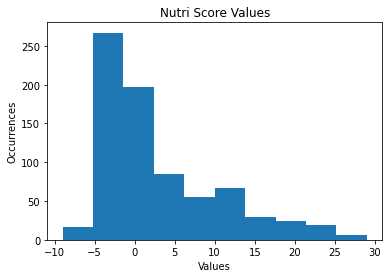

In [38]:
plt.hist(list(foods['nutri_score']))
plt.title('Nutri Score Values')
plt.xlabel('Values')
plt.ylabel('Occurrences')
plt.show()

In [39]:
foods['nutri_score'].min()

-9

In [40]:
foods['nutri_score'].max()

29

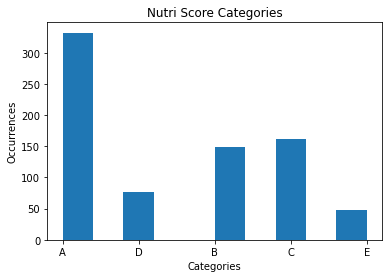

In [41]:
plt.hist(list(foods['nutri_score_category']))
plt.title('Nutri Score Categories')
plt.xlabel('Categories')
plt.ylabel('Occurrences')
plt.show()

In [42]:
number_of_tags = []
for i in range(len(foods)):
    length = len(foods['hasQuality'].iloc[i])
    number_of_tags.append(length)

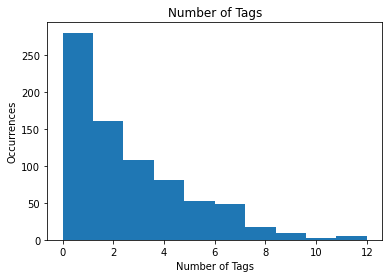

In [43]:
plt.hist(number_of_tags)
plt.title('Number of Tags')
plt.xlabel('Number of Tags')
plt.ylabel('Occurrences')
plt.show()

In [44]:
np.array(number_of_tags).min()

0

In [45]:
np.array(number_of_tags).max()

12